In [1]:
##### IMPORTS ####
import random, requests, os, matplotlib.pyplot as plt, cryptography_functions

### LET USER INPUT TEXT FILE NAME ####

In [2]:
#### FINDING FILE IN DIRECTORY ####

def find_file():
    in_directory = False

    while in_directory == False:
        file_name = input("Input the name of the text file you would like to encrypt / decrypt, including the .txt: ")
        if os.path.isfile(file_name):
            in_directory = True
        else:
            print("")
            print("The file you inputted is not in the directory, try again")
          
    return file_name

In [3]:
#### CASESAR CYPHER ##### (maintains case of characters)

def caesar_encrypt(): #defines the caesar encryption function
    
    file_name = find_file()

    input_text = open(file_name,"r") #opens the text file we want to read
    message = input_text.read() #reads the text file to the variable message
    
    encrypted_text = open("encrypted_text.txt","w") #opens the encrypted text file to which we write the encryption
    
    shift_value_file = open("_caesar_shift_value.txt","w")
    shift_value = random.randint(1,26) #generates a shift value between 1 and 26 inclusive
    
    encrypted_message = []
    
    for character in message: #iterates character through each element of the message
        if character.isalpha(): #checks to see if the character is in the alphabet
            
            if character.isupper(): #checks to see if character is uppercase
                offset = 65 #sets appropriate offset value
            else:
                offset = 97
            
            character_offset = ord(character)-offset #offsets character to be between 0 and 25

            encrypted_message.append(chr((character_offset+shift_value)%26+offset))
            #appends our changed letter to the encrypted message list
    

    final_text = "".join(encrypted_message) #turns the list into a string
    encrypted_text.write(final_text) #writes the string to the text file
    shift_value_file.write(str(shift_value))
    shift_value_file.close()
    encrypted_text.close()
    print("")
    print("Encrypted message written to encrypted_text.txt")
    input_text.close() #closes the files
    
    return 


In [4]:
def caesar_decrypt(): #needs a shift value to decrypt 
    
    file_name = find_file() #lets the user input the file name they would like to read
    
    shift_value_file = open("_caesar_shift_value.txt","r") #opens the shift value file
    shift_value = int(shift_value_file.read()) #read the integer value stored there
    
    encrypted_text = open(file_name,"r") #opens the encrypted text file to read
    cryptic = encrypted_text.read() #sets cryptic to the string value of all the text in encrypted_text.txt
    
    decrypted_text = open("decrypted_text.txt","w") #opens the decrypted text file to write to    

    decrypted_message = []
       
    for character in cryptic: #iterates each character in the cryptic text
        if character.isalpha(): #checks if character is in alphabet
            
            if character.isupper(): #checks if character is uppercase
                offset = 65 #sets appropriate offset
            else:
                offset = 97
            
            character_offset = ord(character)-offset #offsets character to be between 0 and 25
            
            decrypted_message.append(chr((character_offset-shift_value)%26+offset))
            #appends decrypted character to decrypted message list
    
    
        
    final_text = "".join(decrypted_message) #changes the list into a string
    decrypted_text.write(final_text) #writes the string to the text file
    
    decrypted_text.close()  
    encrypted_text.close()#closes the files
    print("")
    print("Decrypted message written to decrypted_text.txt")
    
    return 

In [5]:
caesar_encrypt()

Input the name of the text file you would like to encrypt / decrypt, including the .txt: encrypted_text.txt

Encrypted message written to encrypted_text.txt


In [6]:
#### VIGENERE CYPHER ####
def vigenere_encrypt():
    
    file_name = find_file()
    
    input_text = open(file_name,"r") #opens the text file we want to read
    message_list_unfiltered = list(input_text.read()) #reads the text file to the variable message
    message_list = [x for x in message_list_unfiltered if x.isalpha()] #makes a list of only alphabetical characters
    encrypted_text = open("encrypted_text.txt","w") #opens the encrypted text file to which we write the encryption
    key_file = open("_vigenere_key.txt","w")
   
    
    encrypted_message = []
    key_length = random.randint(129,384) #generates a random length for our keyword
    
    key_list = [random.randint(0,25) for x in range(0,key_length)] #generates a list for our keyword in ASCII
    
    for i in range(0,len(message_list)):

        key_pos =  i%len(key_list) #generates position of where we are in the key
        

        character = message_list[i] #sets character to message character for ease
        if character.isupper(): #checks if y is uppercase in the alphabet
            offset = 65 #sets ASCII offsets
        else: offset = 97

        character_offset = ord(character) - offset #offsets character to be within 0 and 25

        character_encrypted = (character_offset+key_list[key_pos])%26 + offset #encrypts the character 

        encrypted_message.append(chr(character_encrypted)) #appends encrypted character to encrypted message
       
    final_text = "".join(encrypted_message)
    encrypted_text.write(final_text) #writes the final encrypted message to the file
    
    key = "".join(chr(m+65) for m in key_list) #turns keylist into a string
    key_file.write(key) #writes the key to the file
    
    
    encrypted_text.close()
    input_text.close() #closes the files
    key_file.close()
    
    print("Encrypted text written to encrypted_text.txt, and vigenere key written to _vigenere_key.txt")
    
    return      

In [7]:
def vigenere_decrypt():
    
    file_name = find_file()
    
    key_file = open("_vigenere_key.txt","r") #opens file with key in it to read
    key = key_file.read() #reads the file to key
    key_list = [ord(m) - 65 for m in key] #offsets all values of key to be between 0 and 25
    
    encrypted_text = open(file_name,"r") #opens encrypted text file to read
    cryptic = encrypted_text.read() #reads the file to cryptic
    
    decrypted_text = open("decrypted_text.txt","w") #opens the decrypted text file to write to
    decrypted_message = [] #creates decrypted message list
  
    for i in range(0,len(cryptic)): #iterates through the encrypted message
        character = cryptic[i] #sets character to the current character
        key_pos = i%len(key_list) #sets our position within the key 
        
        if character.isupper(): #checks to see if the character is uppercase
            offset = 65 #sets appropriate offset value
        else:
            offset = 97
            
        character_offset = ord(character)-offset #offsets character to be between 0 and 25
        
        character_decrypted = (character_offset-key_list[key_pos])%26 + offset
        #decrypts the character using the keyword
        
        decrypted_message.append(chr(character_decrypted)) #appends character to decrypted message
        
    final_text = "".join(decrypted_message) #turns decrypted message into a string
    decrypted_text.write(final_text) #writes this string to the decrypted text file
    
    decrypted_text.close() #closes the files
    encrypted_text.close()
    key_file.close()
    return
    
    
    

In [8]:
vigenere_encrypt()

Input the name of the text file you would like to encrypt / decrypt, including the .txt: encrypted_text.txt
Encrypted text written to encrypted_text.txt, and vigenere key written to _vigenere_key.txt


In [9]:
#### URL TEXT EXTRACTING ####
def url_to_text_utf8(url):  #### Sourced code from the GitHub repo provided for this project
    '''
    Given a url for a text that is 
    'utf-8' encoded this function 
    returns that text.
    '''
    response = requests.get(url) #gets the URL of the text file
    response.encoding = 'utf-8-sig' #encodes the text file
    return response.text #returns the text file
           
def get_large_text():        
    wonderland = url_to_text_utf8("https://gutenberg.org/cache/epub/11/pg11.txt")[1490:148820]
    gatsby = url_to_text_utf8("https://gutenberg.org/cache/epub/64317/pg64317.txt")[1497:278020]
    dracula = url_to_text_utf8("https://gutenberg.org/cache/epub/345/pg345.txt")[3130:860610]
    moby = url_to_text_utf8("https://gutenberg.org/cache/epub/2701/pg2701.txt")[6000:1241690]
    frankenstein = url_to_text_utf8("https://gutenberg.org/cache/epub/84/pg84.txt")[1440:427680]
    #creates large strings of texts from english books for analysis later

    text = wonderland + gatsby + dracula + moby + frankenstein
    return text

    #text gives us approximately 3 million characters to analyse (not all may be alphabet though most all are)


In [10]:
def frequency_finder(text):
    descending_frequencies = open("decsending_frequent_letters.txt","w")
    counts = {chr(x):0 for x in range(65,91)} #creates a dictionary of all the letters in the alphabet with value 0
    text = text.upper() #makes all text uppercase
    for character in text: #iterates through all the elements of the string "text"
        if character in counts: #checks if the element is an alphabet letter
            counts[character]+=1 #ups the count by one for each letter
    sorted_counts = dict(sorted(counts.items(), key=lambda item: item[1],reverse=True)) #sorts the dictionary by value
    frequency = [x for x in sorted_counts] #creates an ordered list of the letters in decreasing frequency
    descending_frequencies.write("".join(frequency))
    descending_frequencies.close()
    return frequency

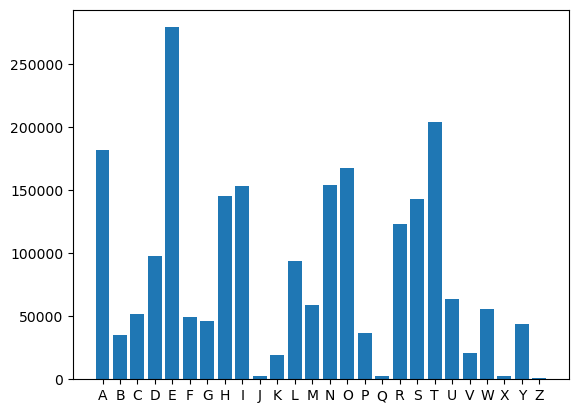

In [11]:
#### GET FREQUENCY OF LETTERS IN ENGLISH LANGUAGE, WRITE TO FILE IN DESCENDING ORDER ####
text = get_large_text()
counts = {chr(x):0 for x in range(65,91)}
text = text.upper()
for character in text:
    if character in counts:
        counts[character]+=1

letters = list(counts.keys())
appearances = list(counts.values())
plt.bar(range(len(counts)),appearances,tick_label=letters)

plt.show() #shows graph of letter frequencies 

descending_frequencies = open("decsending_frequent_letters.txt","w")
sorted_counts = dict(sorted(counts.items(), key=lambda item: item[1],reverse=True)) #sorts the dictionary by value
frequency = [x for x in sorted_counts] #creates an ordered list of the letters in decreasing frequency
descending_frequencies.write("".join(frequency))
descending_frequencies.close() #writes the most frequent letters in descending order to the file



In [12]:
##### CAESAR CYPHER BREAK VIA FREQUENCY ANALYSIS ####

def caesar_frequency_break():
    
    #DONT NEED TO RUN FREQUENCY ANALYSIS EVERY TIME, WRITE TO TEXT FILE
    file_name = find_file()
    
    encrypted_text = open(file_name,"r") #opens the encrypted text file to read
    cryptic = encrypted_text.read() #sets cryptic to the string value of all the text in encrypted_text.txt
    
    decrypted_text = open("decrypted_text.txt","w") #opens the decrypted text file to write to  
    
    frequent_letters = open("decsending_frequent_letters.txt","r")    
    frequency_list = list(frequent_letters.read()) #gets the list of the most frequent letters in descending order
    
  
    
    
    
    message_most_frequent = frequency_finder(cryptic)[0] #finds the most frequent letter in the encrypted message
    
    correctness = False 
    while correctness == False: #iterates until plaintext is found
        for i in range(0,len(frequency_list)):
            decrypted_message = []
            
            shift_value = ord(message_most_frequent) - ord(frequency_list[i]) 
            #finds the shift value with corresponding letter of frequency list 
            
            for character in cryptic: #iterates each character in the cryptic text
                if character.isalpha(): #checks if character is in alphabet

                    if character.isupper(): #checks if character is uppercase
                        offset = 65 #sets appropriate offset
                    else:
                        offset = 97

                    character_offset = ord(character)-offset #offsets character to be between 0 and 25

                    decrypted_message.append(chr((character_offset-shift_value)%26+offset))
                    #appends decrypted character to decrypted message list
            print("".join(decrypted_message))
            print("")
            x = input("Does this look like plaintext? Press enter if so, type anything else if not: ")
            if x == "":
                correctness = True
                print("")
                print("Plaintext written to decrypted_text.txt")
                break
            else:
                continue
    decrypted_text.write("".join(decrypted_message)) #writes the plaintext to decrypted_text
    decrypted_text.close()
    encrypted_text.close()
    frequent_letters.close() #closes the files
    return
    
    

In [13]:
#### TURN VIGENERE KEY INTO NUMBERS ####
 ## SPLIT KEY FIRST, RETURN TUPLE OF SPLIT KEY
def key_to_tuple():
    key_file = open("_vigenere_key.txt","r") #opens the vigenere key file
    key = key_file.read() #reads the vigenere key to key

    num_of_splits = len(key)//64 #gets the quotient of the key length when dividing by 64 to find out our splits
    split_key = []
    for i in range(0,num_of_splits+1): #iterates through splits
        key_num_list = [] #creates a list for our number key
        for character in range(64*i,64*(i+1)): #iterates through all characters of that split
            if character == len(key): #makes sure not to go out of the range of the string
                break
            key_num_list.append(str(ord(key[character])))#appends the string value of the ASCII value of the character

        key_num_str = "".join(key_num_list) #turns the list into a long string
        key_num = int(key_num_str) #turns the string into an integer
        split_key.append(key_num)#applies the split key to the big list
  
    return tuple(split_key)

key_to_tuple()
# EVERY 2 DIGITS REPRESENTS ONE OF THE LETTERS OF OUR KEY

(87748270807383828386877373817965907865707184698667857287827290728066886578877489688373687771888177838478717783847887806884846985,
 65726877778188907867759068727172777590906887707573726686676972767685658389718470768972747190856865748181878881798875818487678372,
 85708578887380817577848567828782666672827865868870818569748578687066657980897167908067828666856670757379898586827174818370827070,
 74807179877087747590747267689082728384827480868988717565828274666881867683666879757080876870898168737585726672856770798270856768,
 706789708179817883788867856685796773)

In [14]:
#### RSA KEY GENERATOR ####

def RSA_key_generator(bitlength=1024): #can take 128 numbers with Bitlength of 1024
    """This will generate RSA keys. This is a version of the private key.
    The output is ((PublicKey), PrivateExp, Factorisation).
    The PublicKey can be published, PrivateExp is needed to decrypt.
    Factorisation is not needed, but must be kept secret."""
    ## Generate two large primes.
    p = cryptography_functions.random_prime(bitlength)
    q = cryptography_functions.random_prime(bitlength)
    N = p*q
    
    ## Next, get phi and use it to get a public and private exponent.
    phi = (p-1)*(q-1)
    ## Choose encryption exponent e randomly between 1 and p and q.
    e = random.randint(1,min(p,q))
    ## It must be coprime to phi though. We use rejection sampling again:    
    while cryptography_functions.gcd(e,phi) > 1:
        e = random.randint(1,min(p,q))
    
    ## Finally, get d using 'pow'
    ## (the extended Euclid's algorithm could do this too).
    d = pow(e,-1,phi)
    
    ## Then return the keys.
    return ((N,e),d%phi,{p:1,q:1})

In [16]:
import re
from collections import Counter
from math import gcd
from functools import reduce
import os


##Load the ciphertext from a user-specified .txt file.

def load_file():
    
    while True:
        fname = input("Enter the encrypted file name (with .txt extension): ")
        if os.path.isfile(fname):  # Check if the file exists
            with open(fname, 'r', encoding='utf-8') as f:
                text = f.read().strip()  # Read the file content
            print(f"Loaded file: {fname}")
            return text
        else:
            print("File not found. Make sure it's in the current directory.")


In [17]:
##Save the decrypted plaintext to a file.
def save_file(text):
    
    output_file = "decrypted_text.txt"
    with open(output_file, 'w', encoding='utf-8') as f:
        f.write(text)
    print(f"Decrypted text saved to: {output_file}")


##Perform Kasiski examination to estimate key length.
def kasiski(text, min_n=3, max_n=5):
    
    dists = []
    for n in range(min_n, max_n + 1):  # Try n-grams from min_n to max_n
        ngrams = [text[i:i + n] for i in range(len(text) - n + 1)]
        repeats = [ng for ng, count in Counter(ngrams).items() if count > 1]
        for ng in repeats:
            positions = [m.start() for m in re.finditer(re.escape(ng), text)]
            dists.extend([positions[i + 1] - positions[i] for i in range(len(positions) - 1)])
    
    # Compute GCD of distances to estimate key length
    if dists:
        key_len = reduce(gcd, dists)
        return key_len if key_len > 1 else None
    return None

In [18]:
##Perform letter frequency analysis. 
def freq_analysis(text):
    
    freq = Counter(filter(str.isalpha, text.upper()))
    return sorted(freq, key=freq.get, reverse=True)  # Return letters sorted by frequency


##Decrypt Vigenère cipher using the given key.

def decrypt(text, key):
    
    plain = []
    klen = len(key)
    for i, char in enumerate(text):  # Loop through each character
        if char.isalpha():
            shift = ord(key[i % klen].upper()) - ord('A')
            if char.isupper():
                plain.append(chr(((ord(char) - shift - 65) % 26) + 65))
            else:
                plain.append(chr(((ord(char) - shift - 97) % 26) + 97))
        else:
            plain.append(char)  # Non-alphabetic characters remain unchanged
    return ''.join(plain)


In [ ]:
##Attempt to break the Vigenère cipher.

def crack_vigenere(text, max_klen=10):
    
    # Step 1: Estimate key length with Kasiski examination
    klen = kasiski(text)
    if not klen:  # If Kasiski fails, try key lengths up to max_klen
        print("Key length not determined. Testing possible lengths...")
        for klen in range(2, max_klen + 1):
            print(f"Trying key length: {klen}")
            result = try_key_len(text, klen)
            if result:
                return result
        print("Failed to decrypt the ciphertext.")
        return None

    print(f"Estimated key length: {klen}")
    return try_key_len(text, klen)


##Try decrypting with a given key length.
   
def try_key_len(text, klen):
    
    key = []
    freq_order = 'ETAOINSHRDLCUMWFGYPBVKJXQZ'  # Common English letter frequency
    for i in range(klen):  # Process each key position
        seg = ''.join(text[j] for j in range(i, len(text), klen))  # Extract the i-th segment
        seg_freq = freq_analysis(seg)  # Analyze letter frequency in the segment

        # Determine the shift for the current segment
        for letter in seg_freq:
            shift = (ord(letter.upper()) - ord('E')) % 26
            decoded = ''.join(
                chr(((ord(c.upper()) - shift - 65) % 26) + 65) if c.isalpha() else c
                for c in seg
            )
            if all(c.upper() in freq_order[:10] for c in decoded[:10]):  # Check plausibility
                key.append(chr(shift + 65))
                break

    if not key:  # If no key could be determined
        return None

    print(f"Estimated key: {''.join(key)}")
    return decrypt(text, ''.join(key))  # Decrypt the text with the determined key


def main():
    print("Welcome to the Vigenère Cipher Cracker!")
    text = load_file()  # Load ciphertext from file
    print("\nAttempting to decrypt...")
    result = crack_vigenere(text)  # Crack the Vigenère cipher
    if result:
        print("\nDecryption successful! The plaintext is:")
        print(result)  # Display the plaintext
        save_file(result)  # Save the plaintext to a file
    else:
        print("\nDecryption failed.")


if __name__ == "__main__":
    main()  # Start the program

Welcome to the Vigenère Cipher Cracker!
